In [4]:
#Import required libraries 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import RobustScaler
from sklearn import datasets
from sklearn.model_selection import train_test_split , KFold
from sklearn.preprocessing import Normalizer
from sklearn.metrics import accuracy_score
from sklearn import neighbors
from sklearn.neighbors import KNeighborsClassifier
from collections import Counter
from scipy import stats
from sklearn.metrics import confusion_matrix
import io
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from patsy import dmatrices
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

In [5]:
from google.colab import files
uploaded = files.upload()

Saving madelon-4.csv to madelon-4.csv


In [6]:
import io

Before performing any dimensionality reduction, I will write a program to use k-means clustering on the Madelon dataset. I will try the following k values: 4, 8, 16, 32, 64. 

Next, I plot the number of clusters k (x-axis) versus the sum of squared distance (SSE) between data points and their assigned centroids (y-axis) to find the optimal k from the list of values used.
For k = 8, how did I initialize the set of cluster centroids before running k-means. Also, Rerun k-means again, this time ensuring that the centroids are all different.
Lastly, discuss evaluation metrics.

In [7]:
data = pd.read_csv(io.BytesIO(uploaded['madelon-4.csv']),index_col=0)

In [8]:
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V491,V492,V493,V494,V495,V496,V497,V498,V499,V500
0,485,477,537,479,452,471,491,476,475,473,...,477,481,477,485,511,485,481,479,475,496
1,483,458,460,487,587,475,526,479,485,469,...,463,478,487,338,513,486,483,492,510,517
2,487,542,499,468,448,471,442,478,480,477,...,487,481,492,650,506,501,480,489,499,498
3,480,491,510,485,495,472,417,474,502,476,...,491,480,474,572,454,469,475,482,494,461
4,484,502,528,489,466,481,402,478,487,468,...,488,479,452,435,486,508,481,504,495,511


In [9]:
data.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V491,V492,V493,V494,V495,V496,V497,V498,V499,V500
count,2600.000000,2600.000000,2600.000000,2600.000000,2600.000000,2600.000000,2600.000000,2600.000000,2600.000000,2600.000000,...,2600.000000,2600.000000,2600.000000,2600.000000,2600.000000,2600.000000,2600.000000,2600.000000,2600.000000,2600.000000
mean,481.742308,483.551154,509.338846,483.364615,500.925769,479.351923,480.488462,476.569615,487.016154,478.806538,...,482.255000,478.803462,486.250769,497.734615,493.812308,510.731538,478.151154,483.157308,508.436538,490.588077
std,6.312905,30.338955,38.798710,8.943204,41.356829,6.896949,40.428218,1.391642,15.277242,7.308349,...,20.857658,4.034889,23.682591,127.455585,34.883461,37.701112,5.863052,13.607801,37.030636,25.926791
min,462.000000,377.000000,370.000000,453.000000,360.000000,459.000000,334.000000,471.000000,430.000000,455.000000,...,407.000000,463.000000,391.000000,103.000000,368.000000,353.000000,457.000000,435.000000,363.000000,403.000000
25%,478.000000,464.000000,484.000000,477.000000,474.000000,475.000000,453.000000,476.000000,477.000000,474.000000,...,468.000000,476.000000,471.000000,405.750000,470.000000,486.000000,474.000000,474.000000,483.000000,473.000000
50%,482.000000,484.000000,509.000000,483.000000,500.000000,479.000000,481.000000,477.000000,487.000000,479.000000,...,482.000000,479.000000,486.000000,505.500000,493.000000,510.000000,478.000000,483.000000,508.000000,491.000000
75%,486.000000,504.000000,535.000000,489.000000,527.000000,484.000000,507.000000,477.000000,497.000000,484.000000,...,496.000000,481.000000,502.000000,586.250000,517.000000,536.000000,482.000000,492.000000,533.000000,508.000000
max,503.000000,610.000000,654.000000,519.000000,688.000000,505.000000,611.000000,482.000000,547.000000,505.000000,...,549.000000,497.000000,571.000000,920.000000,615.000000,661.000000,500.000000,535.000000,644.000000,593.000000


In [10]:

#checking for NA's
sum(np.where(data.isna() == True,1,0)) #checking for nas

#standardizing data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler(with_mean=True, with_std=True)
standardized_data = scaler.fit_transform(data)
standardized_data = pd.DataFrame(standardized_data, columns=data.columns)
#Preprocessing techniques: a. Checking for NA values
#b. standardizing data:
#to ensure all variables have the same scale and variance. 
#Standardizing ensures that variables with different ranges of variances have an equal effect or weigght on the clustering algorithm. 
#If variables have different units or scales, the distances between data points would not be meaningul.

k=4, SSE=1277716.3163273358


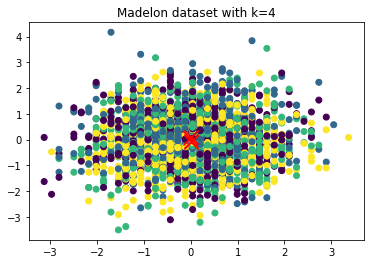

k=8, SSE=1268141.6071742687


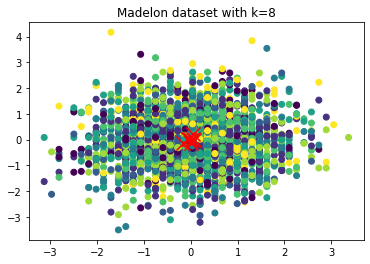

k=16, SSE=1260875.1407265002


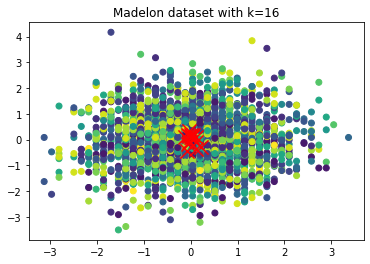

k=32, SSE=1250365.119273683


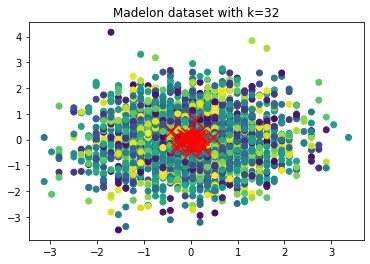

k=64, SSE=1233101.0993298043


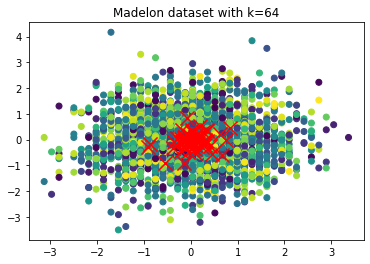

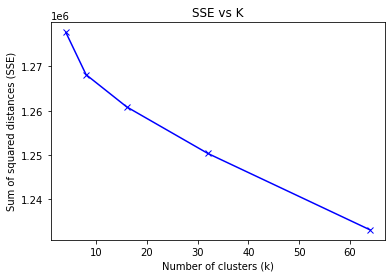

In [11]:
#1.2 and #1.3

# Try different values of k
k_values = [4, 8, 16, 32, 64]
SSE_values = []

for k in k_values:
    # Fit the KMeans model
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(standardized_data)

    # Compute the sum of squared distances
    SSE = kmeans.inertia_
    SSE_values.append(SSE)

    print(f'k={k}, SSE={SSE}')

    # Make a scatter plot of the data with the cluster assignments shown by color
    plt.scatter(standardized_data.iloc[:, 0], standardized_data.iloc[:, 1], c=kmeans.labels_)
    # Add the centroids to the plot
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker="x", s=200, linewidths=3, color="r")
    plt.title("Madelon dataset with k={}".format(k))
    plt.show()


# Plot SSE vs. k
plt.plot(k_values, SSE_values, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of squared distances (SSE)')
plt.title('SSE vs K')
plt.show()


In [12]:

print("As K increases, the SSE decreases. However, this does not mean that the model's performance is becoming better. With increase in K, K will get closer to the number of datapoints and this distance between data poins and mean will decrease. Using the elbow method, we see that the optimat K value should be around 7-8")

As K increases, the SSE decreases. However, this does not mean that the model's performance is becoming better. With increase in K, K will get closer to the number of datapoints and this distance between data poins and mean will decrease. Using the elbow method, we see that the optimat K value should be around 7-8


In [13]:

print("In the previous question, we initialize the centroids using the default kmeans algorithm's  k-means++ initialization method. This method assigns centroids such that they are well spaced out so they represent the data better.")
print("In the next code, we will compare this default method with the 'init' parameter of the KMeans constructor, where we will set the parameter such that centroids are randomly assigned")

In the previous question, we initialize the centroids using the default kmeans algorithm's  k-means++ initialization method. This method assigns centroids such that they are well spaced out so they represent the data better.
In the next code, we will compare this default method with the 'init' parameter of the KMeans constructor, where we will set the parameter such that centroids are randomly assigned


k=8, SSE=1268141.6071742687


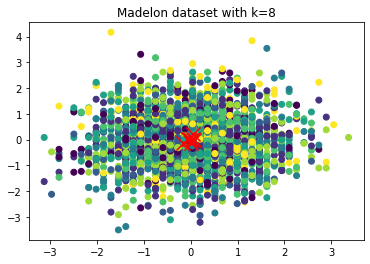

k=8, SSE=1268601.331308714


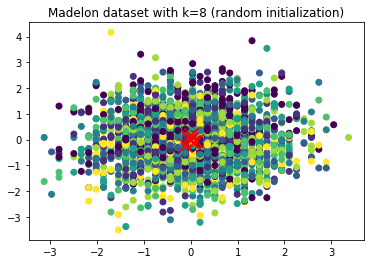

In [14]:

# Set the number of clusters
k = 8

# Run KMeans with default initialization
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(standardized_data)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

SSE = kmeans.inertia_
print(f'k=8, SSE={SSE}')

# Make a scatter plot of the data with the cluster assignments shown by color
plt.scatter(standardized_data.iloc[:, 0], standardized_data.iloc[:, 1], c=labels)
plt.scatter(centroids[:, 0], centroids[:, 1], marker="x", s=200, linewidths=3, color="r")
plt.title("Madelon dataset with k={}".format(k))
plt.show()

# Run KMeans with random initialization
kmeans_random = KMeans(n_clusters=k, init="random", random_state=42)
kmeans_random.fit(standardized_data)
labels_random = kmeans_random.labels_
centroids_random = kmeans_random.cluster_centers_

SSE_random = kmeans_random.inertia_
print(f'k=8, SSE={SSE_random}')

# Make a scatter plot of the data with the cluster assignments shown by color
plt.scatter(standardized_data.iloc[:, 0], standardized_data.iloc[:, 1], c=labels_random)
plt.scatter(centroids_random[:, 0], centroids_random[:, 1], marker="x", s=200, linewidths=3, color="r")
plt.title("Madelon dataset with k={} (random initialization)".format(k))
plt.show()

In [30]:
#1.5 More generally for any dataset, what evaluation metrics can be used to assess the quality of the clusters produced?

print("The quality of a cluster can be evaluated based on how similar the observations within each cluster are, and how dissimilar they are to observations in other clusters. To measure intra-cluster similarity, different cluster-generation methods can be compared by analyzing the total deviance, average, or maximum deviance. For example, the method that produces the lowest maximum deviance generates clusters with the most similar observations. To measure inter-cluster similarity, the distance between each cluster mean can be computed. If the cluster means are farther apart, they are less similar. Clusters that have low intra-cluster distances and high inter-cluster distances are generally of higher quality.")
print("Apart from SSE, some other commonly used metrics includes: \n a). Silhouette score: which measures the similarity of points within a cluster and compares them to points to the nearest neighbour cluster. We look for scores between -1 and 1 which tells us the point is a good match with its own cluster and poor match with a neighboring cluster. \n b) Davies-Bouldin Index (DBI): measures quality by calculating the ratio of the average distance between points in different clusters to the average distance between points within the same cluster. A lower DBI value indicates better separation between clusters")


The quality of a cluster can be evaluated based on how similar the observations within each cluster are, and how dissimilar they are to observations in other clusters. To measure intra-cluster similarity, different cluster-generation methods can be compared by analyzing the total deviance, average, or maximum deviance. For example, the method that produces the lowest maximum deviance generates clusters with the most similar observations. To measure inter-cluster similarity, the distance between each cluster mean can be computed. If the cluster means are farther apart, they are less similar. Clusters that have low intra-cluster distances and high inter-cluster distances are generally of higher quality.
Apart from SSE, some other commonly used metrics includes: 
 a). Silhouette score: which measures the similarity of points within a cluster and compares them to points to the nearest neighbour cluster. We look for scores between -1 and 1 which tells us the point is a good match with its o

The Madelon dataset is high-dimensional, with 500 features per data point. Some of these features might be redundant or noisy, making clustering more difficult. 
In this section, i will fit the standardized data with PCA. Then, create a cumulative variance plot – showing the number of components included (x-axis) versus the amount of variance captured (y-axis). Generally, we want to retain at least 75% of the variance. 
I'll perform PCA with your selected principal components. Code includes-
- Ploting the transformed data on a graph with the first two principal components as the axes i.e. x = PC 1, y = PC 2.
- Ploting the original data on a graph with the two original variables that have the highest absolute combined loading for PC 1 and PC 2 i.e. maximizing |loading PC1| + |loading PC2|.
- Examine the scatter plot of PC 1 (x-axis) versus PC 2 (y-axis) for all data points that you created in the previous part. try to identify visible clusters,

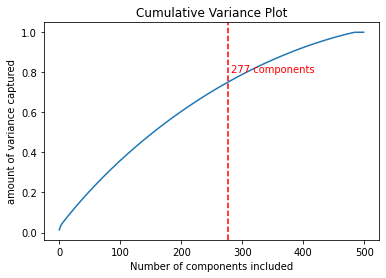

In [16]:

from sklearn.decomposition import PCA

# Fit the standardized data with PCA
pca = PCA()
pca.fit(standardized_data)

# Compute the cumulative explained variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# cumulative variance plot
plt.plot(cumulative_variance)
plt.xlabel('Number of components included')
plt.ylabel('amount of variance captured')
plt.title('Cumulative Variance Plot')

# Identify the number of components required to explain at least 75% of the variance
n_components_75 = np.argmax(cumulative_variance >= 0.75) + 1
plt.axvline(x=n_components_75, linestyle='--', color='r')

plt.text(n_components_75+5, 0.8, f'{n_components_75} components', color='r')


plt.show()

In [17]:
print("We would need to keep 277 components to retain at least 75% of the variance")

We would need to keep 277 components to retain at least 75% of the variance


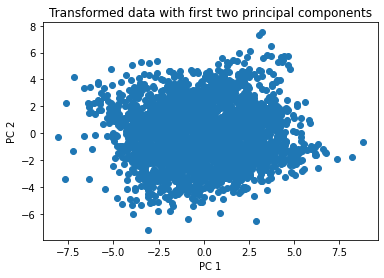

In [18]:


# Fit PCA to the  data with 277 components
n_components = 277
pca = PCA(n_components=n_components)
pca.fit(standardized_data)

transformed_data = pca.transform(standardized_data)

# Plot the transformed data wuth the first two principal components as the axes
plt.scatter(transformed_data[:, 0], transformed_data[:, 1])
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.title('Transformed data with first two principal components')

plt.show()


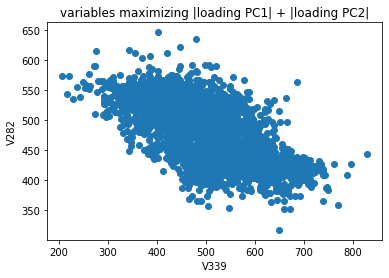

In [19]:

# Find the two original variables with the highest absolute combined loading for PC 1 and PC 2
loadings = pd.DataFrame(pca.components_.T, columns=[f'PC{i+1}' for i in range(n_components)], index=standardized_data.columns)
loadings['combined_loading'] = np.abs(loadings['PC1']) + np.abs(loadings['PC2'])
loadings = loadings.sort_values('combined_loading', ascending=False)
variable1, variable2 = loadings.index[:2]

# Plot the original data with the two variables with the highest absolute combined loading as the x- and y-axes
plt.scatter(data[variable1], data[variable2])
plt.xlabel(variable1)
plt.ylabel(variable2)
plt.title('variables maximizing |loading PC1| + |loading PC2|')

plt.show()

In [31]:
# Examine the scatter plot of PC 1 (x-axis) versus PC 2 (y-axis) for all data points that you created in the previous part. Qualitatively, can you identify visible clusters? Why or why not might this be the case with this particular dataset?

print("The first 2 principal components are only able to capture about 3% of the  total variation making it difficult identify visible clusters. We only see one big cluster with some visible outliers")


The first 2 principal components are only able to capyure about 3% of the  total variation making it difficult identify visible clusters. We only see one big cluster with some visible outliers


 #Now, we will run k-means clustering on the transformed data from the previous problem.


In [32]:
print("Dealing with high-dimensional datasets presents a number of challenges, including difficulties in visualizing and analyzing the data. Clustering algorithms, such as K-means, may also struggle in high-dimensional spaces and can be computationally expensive. PCA can be used to re-orient the data while preserving much of the original data variability. By transforming the data into a lower-dimensional space, it can become easier to visualize and analyze the data, leading to better clustering results. Using just two PCA components to represent the data is a particularly useful approach. This enables the identification of patterns, clusters, and outliers in the data that may be challenging to discern in the original high-dimensional space.")

Dealing with high-dimensional datasets presents a number of challenges, including difficulties in visualizing and analyzing the data. Clustering algorithms, such as K-means, may also struggle in high-dimensional spaces and can be computationally expensive. PCA can be used to re-orient the data while preserving much of the original data variability. By transforming the data into a lower-dimensional space, it can become easier to visualize and analyze the data, leading to better clustering results. Using just two PCA components to represent the data is a particularly useful approach. This enables the identification of patterns, clusters, and outliers in the data that may be challenging to discern in the original high-dimensional space.


k=4, SSE=1268141.6071742687


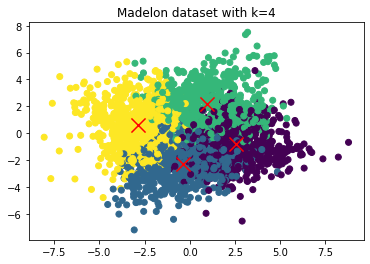

k=8, SSE=1268141.6071742687


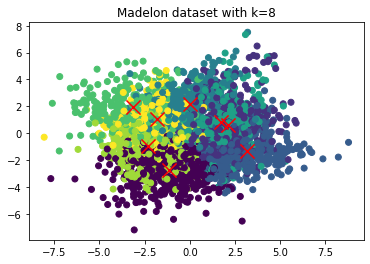

k=16, SSE=1268141.6071742687


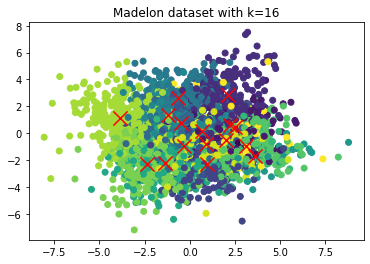

k=32, SSE=1268141.6071742687


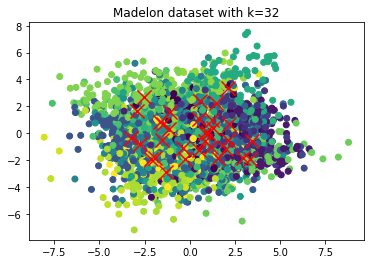

k=64, SSE=1268141.6071742687


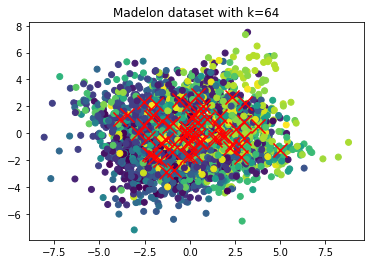

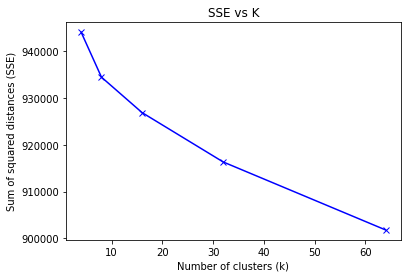

In [22]:

transformed_data_df = pd.DataFrame(transformed_data)

k_values = [4, 8, 16, 32, 64]
SSE_transformed_values = []

for k in k_values:
    # Fit the KMeans model
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(transformed_data_df)

    # Compute the sum of squared distances
    SSE_transformed = kmeans.inertia_
    SSE_transformed_values.append(SSE_transformed)

    print(f'k={k}, SSE={SSE}')

    # Make a scatter plot of the data with the cluster assignments shown by color
    plt.scatter(transformed_data_df.iloc[:, 0], transformed_data_df.iloc[:, 1], c=kmeans.labels_)
    # Add the centroids to the plot
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker="x", s=200, linewidths=3, color="r")
    plt.title("Madelon dataset with k={}".format(k))
    plt.show()


# Plot SSE vs. k
plt.plot(k_values, SSE_transformed_values, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of squared distances (SSE)')
plt.title('SSE vs K')
plt.show()

In [23]:

print("Based on the elbow plot, the optimal k is 8. This is ~ the same as in part 1, however,  the SSE value is much lower.")

Based on the elbow plot, the optimal k is approximately 8. This is still approximately the same as in part 1, but we notice that the SSE value is much lower.


In [33]:

print(SSE_values)
print(SSE_transformed_values)
print("The SSE values for various n clusters prior to PCA are much higher than the SSE values post-PCA. .")

[1277716.3163273358, 1268141.6071742687, 1260875.1407265002, 1250365.119273683, 1233101.0993298043]
[944077.348859309, 934476.1950525991, 926903.1015619979, 916345.0855383297, 901820.9714679508]
The SSE values for various n clusters prior to PCA are much higher than the SSE values post-PCA. .


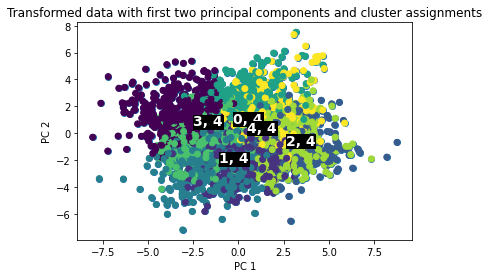

In [34]:

n_clusters = 32
max_iterations = 5

# Fit K-means algorithm to the transformed data
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(transformed_data)

# Extract and label cluster centers 
centers_history = kmeans.cluster_centers_[:max_iterations]
labels_history = kmeans.labels_[:max_iterations]

# Plot first 2 PCA
plt.scatter(transformed_data[:, 0], transformed_data[:, 1])

# Add cluster centers
for i in range(max_iterations):
    centers = centers_history[i]
    labels = labels_history[i]
    color = plt.cm.tab20(i / max_iterations)  # colorcode 
    
    plt.scatter(centers[0], centers[1], s=200, marker='x', c=color)
    
    #labels for the first 5 centers 
    for j, center in enumerate(centers[:5]):
      plt.text(centers[0], centers[1], str(str(i)+", "+str(j)), fontsize=14, color='white', fontweight='bold', ha='center', va='center', bbox=dict(facecolor='black', edgecolor='black', pad=0))

plt.scatter(transformed_data[:, 0], transformed_data[:, 1], c=labels_random)


plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.title('Transformed data with first two principal components and cluster assignments')

plt.show()